In [227]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.figure as fig
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import sklearn
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import tkinter as tk

In [228]:
df=pd.read_csv("post natal data.csv")
df.head()

,Timestamp,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
0,6/14/2022 20:02,35-40,Yes,Yes,Two or more days a week,Yes,Yes,Yes,No,Yes,Yes
1,6/14/2022 20:03,40-45,Yes,No,No,Yes,Yes,No,Yes,Yes,No
2,6/14/2022 20:04,35-40,Yes,No,Yes,Yes,Yes,Yes,No,Sometimes,No
3,6/14/2022 20:05,35-40,Yes,Yes,Yes,Yes,No,Yes,Maybe,No,No
4,6/14/2022 20:06,40-45,Yes,No,Two or more days a week,Yes,No,Yes,No,Yes,No


In [229]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 11 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Timestamp                                  1503 non-null   object
 1   Age                                        1503 non-null   object
 2   Feeling sad or Tearful                     1503 non-null   object
 3   Irritable towards baby & partner           1497 non-null   object
 4   Trouble sleeping at night                  1503 non-null   object
 5   Problems concentrating or making decision  1491 non-null   object
 6   Overeating or loss of appetite             1503 non-null   object
 7   Feeling anxious                            1503 non-null   object
 8   Feeling of guilt                           1494 non-null   object
 9   Problems of bonding with baby              1503 non-null   object
 10  Suicide attempt                     

Timestamp                                     0
Age                                           0
Feeling sad or Tearful                        0
Irritable towards baby & partner              6
Trouble sleeping at night                     0
Problems concentrating or making decision    12
Overeating or loss of appetite                0
Feeling anxious                               0
Feeling of guilt                              9
Problems of bonding with baby                 0
Suicide attempt                               0
dtype: int64

In [230]:
df=df.drop(columns=['Timestamp'])
df=df.dropna()
df.isnull().sum()

Age                                          0
Feeling sad or Tearful                       0
Irritable towards baby & partner             0
Trouble sleeping at night                    0
Problems concentrating or making decision    0
Overeating or loss of appetite               0
Feeling anxious                              0
Feeling of guilt                             0
Problems of bonding with baby                0
Suicide attempt                              0
dtype: int64

In [231]:
for col in df.select_dtypes(include='object'):
    df[col] = df[col].astype('category')
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1491 entries, 0 to 1502
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype   
---  ------                                     --------------  -----   
 0   Age                                        1491 non-null   category
 1   Feeling sad or Tearful                     1491 non-null   category
 2   Irritable towards baby & partner           1491 non-null   category
 3   Trouble sleeping at night                  1491 non-null   category
 4   Problems concentrating or making decision  1491 non-null   category
 5   Overeating or loss of appetite             1491 non-null   category
 6   Feeling anxious                            1491 non-null   category
 7   Feeling of guilt                           1491 non-null   category
 8   Problems of bonding with baby              1491 non-null   category
 9   Suicide attempt                            1491 non-null   category
dtypes: category(

In [232]:
cat_cols = df.select_dtypes(include=['category']).columns
for col in cat_cols:
  uniqueLabels = list(df[col].unique())
  print(f"{col} unique labels :")
  print(uniqueLabels)

Age unique labels :
['35-40', '40-45', '30-35', '45-50', '25-30']
Feeling sad or Tearful unique labels :
['Yes', 'No', 'Sometimes']
Irritable towards baby & partner unique labels :
['Yes', 'No', 'Sometimes']
Trouble sleeping at night unique labels :
['Two or more days a week', 'No', 'Yes']
Problems concentrating or making decision unique labels :
['Yes', 'No', 'Often']
Overeating or loss of appetite unique labels :
['Yes', 'No', 'Not at all']
Feeling anxious unique labels :
['Yes', 'No']
Feeling of guilt unique labels :
['No', 'Yes', 'Maybe']
Problems of bonding with baby unique labels :
['Yes', 'Sometimes', 'No']
Suicide attempt unique labels :
['Yes', 'No', 'Not interested to say']


In [233]:
df2=pd.get_dummies(data=df,columns=df.columns[0:])
df2.head()

,Age_25-30,Age_30-35,Age_35-40,Age_40-45,Age_45-50,Feeling sad or Tearful_No,Feeling sad or Tearful_Sometimes,Feeling sad or Tearful_Yes,Irritable towards baby & partner_No,Irritable towards baby & partner_Sometimes,...,Feeling anxious_Yes,Feeling of guilt_Maybe,Feeling of guilt_No,Feeling of guilt_Yes,Problems of bonding with baby_No,Problems of bonding with baby_Sometimes,Problems of bonding with baby_Yes,Suicide attempt_No,Suicide attempt_Not interested to say,Suicide attempt_Yes
0,0,0,1,0,0,0,0,1,0,0,...,1,0,1,0,0,0,1,0,0,1
1,0,0,0,1,0,0,0,1,1,0,...,0,0,0,1,0,0,1,1,0,0
2,0,0,1,0,0,0,0,1,1,0,...,1,0,1,0,0,1,0,1,0,0
3,0,0,1,0,0,0,0,1,0,0,...,1,1,0,0,1,0,0,1,0,0
4,0,0,0,1,0,0,0,1,1,0,...,1,0,1,0,0,0,1,1,0,0


In [237]:
model = keras.Sequential([
    keras.layers.Dense(81, input_dim=9, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)
loss2, accuracy2 =model.evaluate(X_train,y_train)
print(f'Training dataset loss: {loss2}, validation: {accuracy2}')
print(f'Validation dataset Loss: {loss}, Test Accuracy: {accuracy}')



Epoch 1/20
38/38 [==============================] - 2s 10ms/step - loss: 0.5686 - accuracy: 0.7148 - val_loss: 0.4539 - val_accuracy: 0.8227
Epoch 2/20
38/38 [==============================] - 0s 4ms/step - loss: 0.4890 - accuracy: 0.7576 - val_loss: 0.4579 - val_accuracy: 0.7592
Epoch 3/20
38/38 [==============================] - 0s 4ms/step - loss: 0.4396 - accuracy: 0.7794 - val_loss: 0.3838 - val_accuracy: 0.8161
Epoch 4/20
38/38 [==============================] - 0s 4ms/step - loss: 0.3973 - accuracy: 0.8079 - val_loss: 0.3555 - val_accuracy: 0.8261
Epoch 5/20
38/38 [==============================] - 0s 5ms/step - loss: 0.3696 - accuracy: 0.8213 - val_loss: 0.3544 - val_accuracy: 0.8294
Epoch 6/20
38/38 [==============================] - 0s 4ms/step - loss: 0.3368 - accuracy: 0.8440 - val_loss: 0.3152 - val_accuracy: 0.8428
Epoch 7/20
38/38 [==============================] - 0s 4ms/step - loss: 0.3160 - accuracy: 0.8582 - val_loss: 0.3165 - val_accuracy: 0.8528
Epoch 8/20
38/38 [=

10/10 [==============================] - 0s 2ms/step


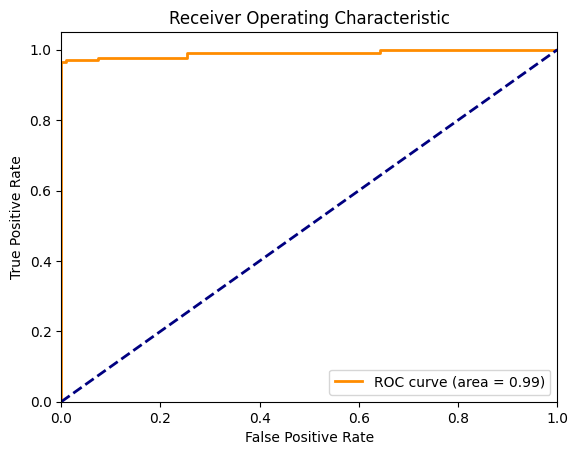

In [238]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from plotnine import *
import plotnine


predicted_probabilities = model.predict(X_test)
positive_probabilities = predicted_probabilities[:, 0]

fpr, tpr, thresholds = roc_curve(y_test, positive_probabilities)
roc_auc = auc(fpr, tpr)
df_fpr_tpr = pd.DataFrame({'FPR':fpr, 'TPR':tpr, 'Threshold':thresholds})
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])

plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()



In [240]:

class Questionnaire:
    def __init__(self, root):
        self.root = root 
        super().__init__()
        self.root.title("Depression Questionnaire")
        self.root.geometry("600x400")
        self.canv_frame = tk.Frame(root)
        self.canv = tk.Canvas(self.canv_frame, highlightthickness=0 , width= 420)
        self.canv.bind_all("<MouseWheel>", lambda event: self.canv.yview_scroll(-1 * (event.delta // 120), tk.UNITS))
        self.canv.pack(fill=tk.BOTH, expand= tk.YES, side = tk.LEFT)



        self.yscrollbar = tk.Scrollbar(self.canv_frame, orient="vertical", command=self.canv.yview)
        self.canv["yscrollcommand"] = self.yscrollbar.set
        self.yscrollbar.pack(side=tk.RIGHT, fill=tk.Y)



        self.create_widgets(root)


    def create_widgets(self, root):
        # Create question 1
        
        titleframe = tk.Frame(self.canv)
        self.title_label = tk.Label(titleframe, text="Depression Questionnaire",font =("Times",20), fg = "purple")
        self.title_label.pack()
        self.canv.create_window(210, 50, window= titleframe)
        self.canv_frame.pack(fill= tk.BOTH, expand= tk.YES)


        qaframe = tk.Frame(self.canv)
        aframe = tk.Frame(qaframe)
        
        self.question1_label = tk.Label(qaframe, text="1. What is your age?")
        self.question1_label.pack()
        self.question1_var = tk.StringVar(None)
        self.question1_radio1 = tk.Radiobutton(aframe, text= "25-30", variable=self.question1_var, value="25-30" , indicatoron= False)
        self.question1_radio1.pack()
        self.question1_radio2 = tk.Radiobutton(aframe, text= "30-35", variable=self.question1_var, value="30-35" , indicatoron= False)
        self.question1_radio2.pack()
        self.question1_radio3 = tk.Radiobutton(aframe, text= "35-40", variable=self.question1_var, value="35-40" , indicatoron= False)
        
        self.question1_radio3.pack()
        self.question1_radio4 = tk.Radiobutton(aframe, text= "40-45", variable=self.question1_var, value="40-45", indicatoron= False)
      
        self.question1_radio4.pack()
        self.question1_radio5 = tk.Radiobutton(aframe, text= "45-50", variable=self.question1_var, value="45-50" , indicatoron= False)
       
        self.question1_radio5.pack()
        aframe.pack(fill = tk.Y)
        self.canv.create_window(210 , 150, window=qaframe)
        self.canv_frame.pack(fill=tk.BOTH, expand= tk.YES)

        # Create question 2
        qaframe = tk.Frame(self.canv)
        aframe = tk.Frame(qaframe)
        self.question2_label = tk.Label(qaframe, text="2. Do you feel sad or tearful?")
        self.question2_label.pack()
        self.question2_var = tk.StringVar()
        self.question2_radio1 = tk.Radiobutton(aframe, text="Yes", variable=self.question2_var, value="Yes", indicatoron= False)
        self.question2_radio1.pack()
        self.question2_radio2 = tk.Radiobutton(aframe, text="No", variable=self.question2_var, value="No" , indicatoron= False)
        self.question2_radio2.pack()
        self.question2_radio3 = tk.Radiobutton(aframe, text="Sometimes", variable=self.question2_var, value="Sometimes", indicatoron= False)
        self.question2_radio3.pack()
        aframe.pack(fill = tk.Y)
        self.canv.create_window(210 , 250, window=qaframe)
        self.canv_frame.pack(fill=tk.BOTH, expand= tk.YES)


        # Create question 3
        qaframe = tk.Frame(self.canv)
        aframe = tk.Frame(qaframe)
        self.question3_label = tk.Label(qaframe, text="3. Are you irritable towards your baby and partner?")
        self.question3_label.pack()
        self.question3_var = tk.StringVar()
        self.question3_radio1 = tk.Radiobutton(aframe, text="Yes", variable=self.question3_var, value="Yes", indicatoron= False)
        self.question3_radio1.pack()
        self.question3_radio2 = tk.Radiobutton(aframe, text="No", variable=self.question3_var, value="No", indicatoron= False)
        self.question3_radio2.pack()
        self.question3_radio3 = tk.Radiobutton(aframe, text="Sometimes", variable=self.question3_var, value="Sometimes", indicatoron= False)
        self.question3_radio3.pack()
        aframe.pack(fill = tk.Y)
        self.canv.create_window(210 , 350, window=qaframe)
        self.canv_frame.pack(fill=tk.BOTH, expand= tk.YES)


        # Create question 4
        qaframe = tk.Frame(self.canv)
        aframe = tk.Frame(qaframe)
        self.question4_label = tk.Label(qaframe, text="4. Do you have trouble sleeping at night?")
        self.question4_label.pack()
        self.question4_var = tk.StringVar()
        self.question4_radio1 = tk.Radiobutton(aframe, text="Yes", variable=self.question4_var, value="Yes", indicatoron= False)
        self.question4_radio1.pack()
        self.question4_radio2 = tk.Radiobutton(aframe, text="No", variable=self.question4_var, value="No", indicatoron= False)
        self.question4_radio2.pack()
        self.question4_radio3 = tk.Radiobutton(aframe, text="Two or more days a week", variable=self.question4_var, value="Two or more days a week", indicatoron= False)
        self.question4_radio3.pack()
        aframe.pack(fill = tk.Y)
        self.canv.create_window(210 , 450, window=qaframe)
        self.canv_frame.pack(fill=tk.BOTH, expand= tk.YES)

        # Create question 5
        qaframe = tk.Frame(self.canv)
        aframe = tk.Frame(qaframe)
        self.question5_label = tk.Label(qaframe, text="5. Do you have problems concentrating or making decisions?")
        self.question5_label.pack()
        self.question5_var = tk.StringVar()
        self.question5_radio1 = tk.Radiobutton(aframe, text="Yes", variable=self.question5_var, value="Yes", indicatoron= False)
        self.question5_radio1.pack()
        self.question5_radio2 = tk.Radiobutton(aframe, text="No", variable=self.question5_var, value="No", indicatoron= False)
        self.question5_radio2.pack()
        self.question5_radio3 = tk.Radiobutton(aframe, text="Often", variable=self.question5_var, value="Often", indicatoron= False)
        self.question5_radio3.pack()
        aframe.pack(fill = tk.Y)
        self.canv.create_window(210 , 550, window=qaframe)
        self.canv_frame.pack(fill=tk.BOTH, expand= tk.YES)

        # Create question 6
        qaframe = tk.Frame(self.canv)
        aframe = tk.Frame(qaframe)
        self.question6_label = tk.Label(qaframe, text="6. Do you overeat or have a loss of appetite?")
        self.question6_label.pack()
        self.question6_var = tk.StringVar()
        self.question6_radio1 = tk.Radiobutton(aframe, text="Yes", variable=self.question6_var, value="Yes", indicatoron= False)
        self.question6_radio1.pack()
        self.question6_radio2 = tk.Radiobutton(aframe, text="No", variable=self.question6_var, value="No" , indicatoron= False)
        self.question6_radio2.pack()
        self.question6_radio3 = tk.Radiobutton(aframe, text="Not at all", variable=self.question6_var, value="Not at all" , indicatoron= False)
        self.question6_radio3.pack()
        aframe.pack(fill = tk.Y)
        self.canv.create_window(210 , 650, window=qaframe)
        self.canv_frame.pack(fill=tk.BOTH, expand= tk.YES)

        # Create question 7
        qaframe = tk.Frame(self.canv)
        aframe = tk.Frame(qaframe)
        self.question8_label = tk.Label(qaframe, text="7. Do you feel guilt?")
        self.question8_label.pack()
        self.question8_var = tk.StringVar()
        self.question8_radio1 = tk.Radiobutton(aframe, text="Yes", variable=self.question8_var, value="Yes", indicatoron= False)
        self.question8_radio1.pack()
        self.question8_radio2 = tk.Radiobutton(aframe, text="No", variable=self.question8_var, value="No" , indicatoron= False)
        self.question8_radio2.pack()
        self.question8_radio3 = tk.Radiobutton(aframe, text="Maybe", variable=self.question8_var, value="Maybe", indicatoron= False)
        self.question8_radio3.pack()
        aframe.pack(fill = tk.Y)
        self.canv.create_window(210 , 750, window=qaframe)
        self.canv_frame.pack(fill=tk.BOTH, expand= tk.YES)

        # Create question 8
        qaframe = tk.Frame(self.canv)
        aframe = tk.Frame(qaframe)
        self.question9_label = tk.Label(qaframe, text="8. Do you have problems in bonding with the baby?")
        self.question9_label.pack()
        self.question9_var = tk.StringVar()
        self.question9_radio1 = tk.Radiobutton(aframe, text="Yes", variable=self.question9_var, value="Yes", indicatoron= False)
        self.question9_radio1.pack()
        self.question9_radio2 = tk.Radiobutton(aframe, text="No", variable=self.question9_var, value="No", indicatoron= False)
        self.question9_radio2.pack()
        self.question9_radio3 = tk.Radiobutton(aframe, text="Sometimes", variable=self.question9_var, value="Sometimes", indicatoron= False)
        self.question9_radio3.pack()
        aframe.pack(fill = tk.Y)
        self.canv.create_window(210 , 850, window=qaframe)
        self.canv_frame.pack(fill=tk.BOTH, expand= tk.YES)

        # Create question 9
        qaframe = tk.Frame(self.canv)
        aframe = tk.Frame(qaframe)
        self.question10_label = tk.Label(qaframe, text="9. Have you ever made any suicide attempts?")
        self.question10_label.pack()
        self.question10_var = tk.StringVar()
        self.question10_radio1 = tk.Radiobutton(aframe, text="Yes", variable=self.question10_var, value="Yes" , indicatoron= False)
        self.question10_radio1.pack()
        self.question10_radio2 = tk.Radiobutton(aframe, text="No", variable=self.question10_var, value="No" , indicatoron= False)
        self.question10_radio2.pack()
        self.question10_radio3 = tk.Radiobutton(aframe, text="Not interested to say", variable=self.question10_var, value="Not interested to say" , indicatoron= False)
        self.question10_radio3.pack()
        aframe.pack(fill = tk.Y)
        self.canv.create_window(210 , 950, window=qaframe)
        self.canv_frame.pack(fill=tk.BOTH, expand= tk.YES)

        # Create submit
        submitframe = tk.Frame(self.canv)
        self.submit_button = tk.Button(submitframe, text="Submit" , command=self.submit).pack(fill = tk.X)
        self.canv.create_window(210 , 1050, window=submitframe)
        self.canv_frame.pack(fill = tk.Y)
        #self.update()
        #self.canv.configure(scrollregion= self.canv.bbox("all"))
     
    


    def submit(self):
        q1 = self.question1_var.get()
        q2 = self.question2_var.get()
        q3 = self.question3_var.get()
        q4 = self.question4_var.get()
        q5 = self.question5_var.get()
        q6 = self.question6_var.get()
        q8 = self.question8_var.get()
        q9 = self.question9_var.get()
        q10 = self.question10_var.get()
        age = age_group[q1]
        feels = feeling_sad[q2]
        irrit = irritable[q3]
        trouble = trouble_sleeping[q4]
        problems = problems_concentrating[q5]
        over = overeating[q6]
        guilt = feeling_guilt[q8]
        bonding = problems_of_bonding[q9]
        suicide = suicide_attempt[q10]
        test = np.array([[age, feels, irrit, trouble, problems, over,guilt, bonding, suicide]])
        y_pred = model.predict(test)

        
        print(y_pred)
        yes_percentage = 1 - thresholdOpt
        no_percentage = thresholdOpt
        if(y_pred > thresholdOpt):
            print("Yes you are feeling anxious")
            outputpercent = ((y_pred - thresholdOpt) / yes_percentage) * 100
            print('There is a {} percent chance that you are feeling anxious'.format(round(float(outputpercent), 0 )))
            aframe = tk.Frame(self.canv)
            self.answerlabel = tk.Label(aframe, text ='There is a {} % chance that you are feeling anxious'.format(round(float(outputpercent), 0) ), fg = 'purple')
            self.answerlabel.pack()
            self.canv.create_window(210 , 1100, window=aframe)
            self.canv_frame.pack(fill = tk.Y)

        else:
            print("No You are not feeling anxious")
            outputpercent = ((thresholdOpt - y_pred) / no_percentage) * 100
            print('There is a {} percent chance that you are not feeling anxious'.format(outputpercent))
            aframe = tk.Frame(self.canv)
            self.answerlabel = tk.Label(aframe, text ='There is a {} % chance that you are not feeling anxious'.format(round(float(outputpercent), 0) ), fg = 'purple')
            self.answerlabel.pack()
            self.canv.create_window(210 , 1100, window=aframe)
            self.canv_frame.pack(fill = tk.Y)
       

        print("Submit Button Pressed")
        self.show_spectrum(y_pred)
       
        

    def show_spectrum(self, y_pred):
      
        output_values = np.linspace(0, 1, 100) 
        output= y_pred

      
        proximity = np.abs(output_values - thresholdOpt)

    
        colors = plt.cm.viridis(proximity)

    
        plt.figure(figsize=(10, 6))
        plt.scatter(output_values, [0] * len(output_values), c=colors, s=100)
        plt.axvline(x=thresholdOpt, color='red', linestyle='--', label='Threshold')
        plt.xlabel('Output Value')
        plt.yticks([])
        plt.title('Proximity Spectrum')
        plt.text(0.02, 0.002, "No", ha='right', fontsize=12)
        plt.text(0.98, 0.002, "Yes", ha='left', fontsize=12)
        plt.text(thresholdOpt-0.01, 0.002, "Weak No", ha='right', fontsize=12)
        plt.text(thresholdOpt+0.01, 0.002, "Weak Yes", ha='left', fontsize=12)
        plt.colorbar(label='Proximity to Threshold')
        plt.annotate(f'Output: {output}', xy=(output, 0), xytext=(output, -0.03),arrowprops=dict(facecolor='black', arrowstyle='->'), ha='center')
        plt.legend()
        plt.show()
            
    
        

1/1 [==============================] - 0s 65ms/step
[[0.9597806]]
Yes you are feeling anxious
There is a 83.0 percent chance that you are feeling anxious
Submit Button Pressed


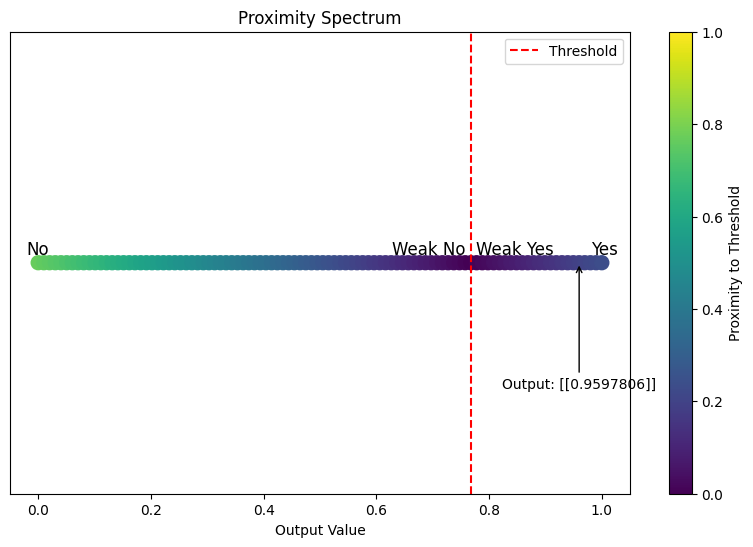

In [241]:
root = tk.Tk()
root.title("Depression Questionnaire")
app = Questionnaire(root)


root.mainloop()